In [1]:
setwd("/mnt/data1/peng/workbase2/scNTseq/github/input")

### Fig 5c

In [2]:
dat.fig5c <- readRDS("Fig5c.rds")

In [3]:
# zscore transformation
cal_z_score <- function(x){
  (x - mean(x)) / sd(x)
}
matt <- t(apply(dat.fig5c, 1, cal_z_score))
matt[matt > 3] <- 3
matt[matt < -3] <- -3

In [4]:
library(RColorBrewer)

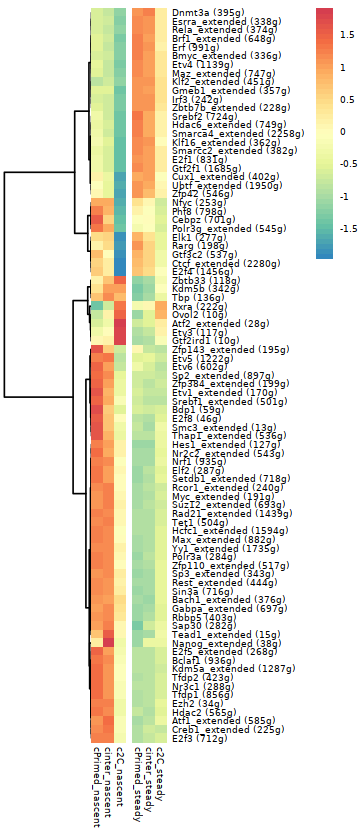

In [5]:
options(repr.plot.height=7,repr.plot.width=3)
pheatmap::pheatmap(matt,show_colnames = T,cluster_rows = T,cluster_cols = F,
                   color = rev(colorRampPalette(brewer.pal(9,"Spectral"))(50)),
                  fontsize = 5,clustering_method ="ward.D",border_color ="NA",gaps_col = 3)

### Fig 5d

In [6]:
dat.fig5d <- readRDS("Fig5d.rds") 

In [9]:
library(ggplot2)
library(cowplot)
library(RColorBrewer)
theme_set(theme_cowplot())

In [12]:
dat.fig5d$res.name <- factor(dat.fig5d$res.name,levels = c("Primed","inter","2C"))
dat.fig5d$genotype <- factor(dat.fig5d$genotype,levels = c("WT","TKO"))

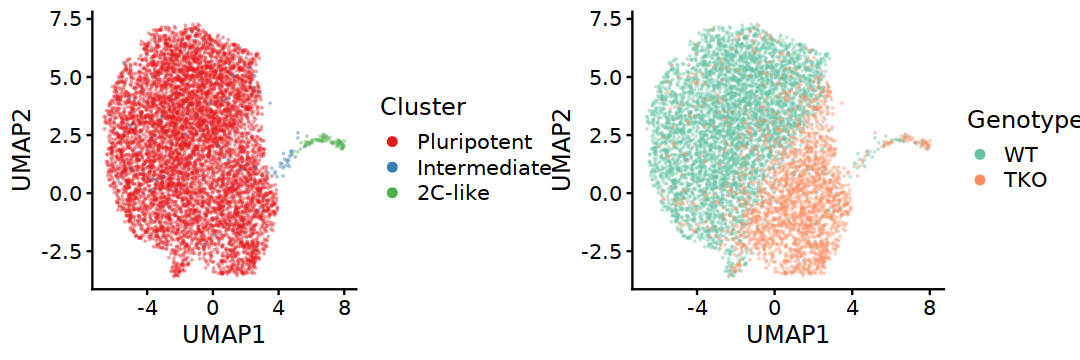

In [32]:
options(repr.plot.width=9,repr.plot.height=3)
p1 <- ggplot(dat.fig5d,aes(V1,V2)) + geom_point(aes(col=res.name),size=.1,alpha=.3) + 
     scale_color_manual("Cluster",values = brewer.pal(n=9,name="Set1")[1:3],labels=c("Pluripotent","Intermediate","2C-like")) + 
     xlab("UMAP1") + ylab("UMAP2") +
     guides(colour = guide_legend(override.aes = list(size=2,alpha=1)))
p2 <- ggplot(dat.fig5d,aes(V1,V2)) + geom_point(aes(col=genotype),size=.1,alpha=.3) + 
     scale_color_manual("Genotype",values = brewer.pal(n=8,name="Set2")[1:3]) + xlab("UMAP1") + ylab("UMAP2") +
     guides(colour = guide_legend(override.aes = list(size=2,alpha=1)))

plot_grid(p1,p2)

### Fig 5e

In [31]:
dat.fig5e <- readRDS("Fig5e.rds")

In [35]:
MATT <- prop.table(table(dat.fig5e$res.name,dat.fig5e$orig.ident2),margin = 2)
MATT2 <- reshape2::melt(MATT,by="row.names")
MATT2$Var1 <- factor(MATT2$Var1,levels=c("Primed","inter","2C"),labels = c("Pluripotent","Intermediate","2C-like"))

In [38]:
MATT2$Var2 <- factor(MATT2$Var2,levels=c("WT-rep1","WT-rep2","TKO-rep1","TKO-rep2"))

In [42]:
brewer.pal("Paired",n=4)

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C"

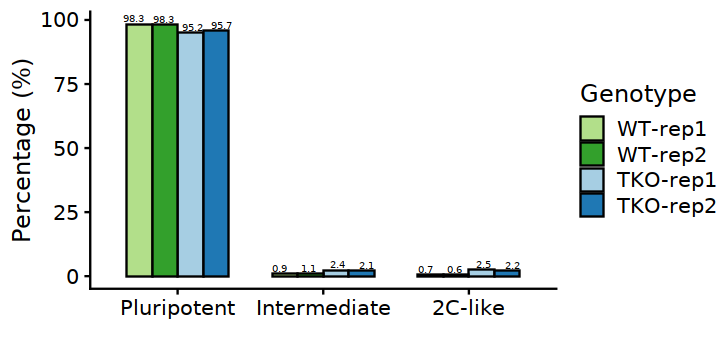

In [44]:
options(repr.plot.width=6,repr.plot.height=3)
ggplot(MATT2,aes(Var1,value*100,fill=Var2))  + 
  geom_bar(stat = "identity", position="dodge",width=.7,col="black") +
  geom_text(aes(label=round(value*100,1)), position=position_dodge(width=0.8), vjust=-0.25,size=2) +
  scale_fill_manual("Genotype",values=c('#B2DF8A','#33A02C','#A6CEE3','#1F78B4')) + xlab("") + ylab("Percentage (%)")

### Fig 5f

In [45]:
dat.fig5f <- readRDS("Fig5f.rds")

In [46]:
gene.in <- dat.fig5f %>% filter(gene %in% c("Tet1","Tet2"),cluster == "Primed")

In [47]:
library(ggrepel)

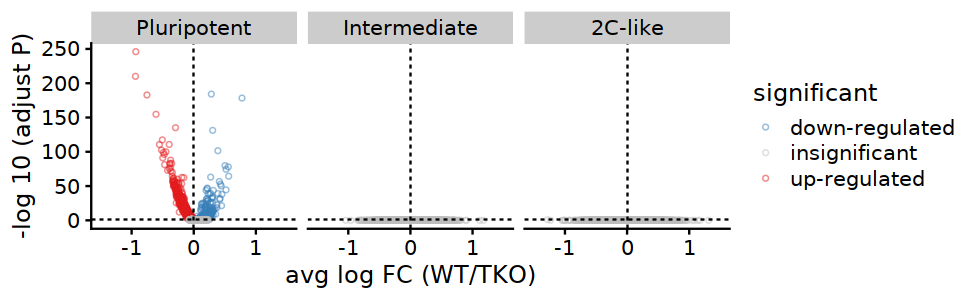

In [48]:
options(repr.plot.width=8,repr.plot.height=2.5)
ggplot(dat.fig5f,aes(avg_logFC,logP,col=significant)) + geom_point(size=1,shape=1,alpha=.5) + 
  facet_grid(~cluster) + scale_color_manual(values=c("#377EB8",'grey','#E41A1C')) + xlim(-1.5,1.5) +
  geom_hline(yintercept = -log10(0.05),linetype="dashed") +
  geom_vline(xintercept = 0,linetype="dashed") + theme_cowplot() + xlab("avg log FC (WT/TKO)") + ylab("-log 10 (adjust P)") +
  geom_text_repel(data=gene.in,aes(avg_logFC,logP,label=gene),col="black",box.padding = rel(0.5))

### Fig 5g

In [49]:
dat.fig5g <- readRDS("Fig5g.rds")

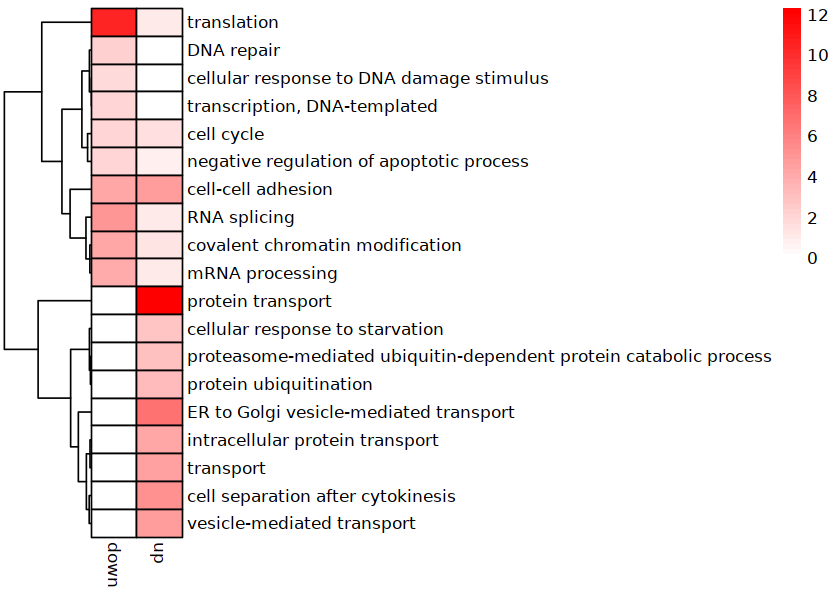

In [59]:
options(repr.plot.height=5,repr.plot.width=7)
pheatmap::pheatmap(dat.fig5g,show_colnames = T,cluster_rows = T,cluster_cols = F,
                   color = colorRampPalette(c("white","red"))(50),
                  clustering_method ="ward.D2",border_color ="black")